In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'dataset/lung.cellxgene.h5ad'

adata = sc.read_h5ad(results_file)
adata

scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


AnnData object with n_obs × n_vars = 57020 × 25204 
    obs: 'Donor', 'Time', 'donor_time', 'organ', 'patient', 'sample', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Celltypes'
    var: 'gene_ids-HCATisStab7509734', 'gene_ids-HCATisStab7509735', 'gene_ids-HCATisStab7509736', 'gene_ids-HCATisStab7587202', 'gene_ids-HCATisStab7587205', 'gene_ids-HCATisStab7587208', 'gene_ids-HCATisStab7587211', 'gene_ids-HCATisStab7646032', 'gene_ids-HCATisStab7646033', 'gene_ids-HCATisStab7646034', 'gene_ids-HCATisStab7646035', 'gene_ids-HCATisStab7659968', 'gene_ids-HCATisStab7659969', 'gene_ids-HCATisStab7659970', 'gene_ids-HCATisStab7659971', 'gene_ids-HCATisStab7747197', 'gene_ids-HCATisStab7747198', 'gene_ids-HCATisStab7747199', 'gene_ids-HCATisStab7747200', 'n_cells'
    uns: 'Celltypes_colors'
    obsm: 'X_pca', 'X_umap'

In [4]:
list(set(adata.obs['Celltypes']))

['Alveolar_Type2',
 'Mast_cells',
 'Lymph_vessel',
 'DC_1',
 'DC_plasmacytoid',
 'Macrophage_MARCOneg',
 'DC_2',
 'Macrophage_MARCOpos',
 'T_cells_Dividing',
 'B_cells',
 'Alveolar_Type1',
 'T_CD8_CytT',
 'DC_Monocyte_Dividing',
 'DC_activated',
 'Blood_vessel',
 'NK_Dividing',
 'Ciliated',
 'Muscle_cells',
 'T_regulatory',
 'NK',
 'Plasma_cells',
 'Monocyte',
 'Macrophage_Dividing',
 'Fibroblast',
 'T_CD4']

In [5]:
# subset to macrophages and monocyte
adata = adata[adata.obs['Celltypes'].isin(['DC_activated', 'DC_1','DC_2','Monocyte', 'Macrophage_MARCOneg', 'Macrophage_MARCOpos', 'Macrophage_Dividing'])]
adata

View of AnnData object with n_obs × n_vars = 13500 × 25204 
    obs: 'Donor', 'Time', 'donor_time', 'organ', 'patient', 'sample', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Celltypes'
    var: 'gene_ids-HCATisStab7509734', 'gene_ids-HCATisStab7509735', 'gene_ids-HCATisStab7509736', 'gene_ids-HCATisStab7587202', 'gene_ids-HCATisStab7587205', 'gene_ids-HCATisStab7587208', 'gene_ids-HCATisStab7587211', 'gene_ids-HCATisStab7646032', 'gene_ids-HCATisStab7646033', 'gene_ids-HCATisStab7646034', 'gene_ids-HCATisStab7646035', 'gene_ids-HCATisStab7659968', 'gene_ids-HCATisStab7659969', 'gene_ids-HCATisStab7659970', 'gene_ids-HCATisStab7659971', 'gene_ids-HCATisStab7747197', 'gene_ids-HCATisStab7747198', 'gene_ids-HCATisStab7747199', 'gene_ids-HCATisStab7747200', 'n_cells'
    uns: 'Celltypes_colors'
    obsm: 'X_pca', 'X_umap'

In [7]:
# save first
adata.write('dataset/lung.h5ad', compression = 'gzip')

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'dataset/lung.h5ad'

adata = sc.read_h5ad(results_file)
adata

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


AnnData object with n_obs × n_vars = 13500 × 25204 
    obs: 'Donor', 'Time', 'donor_time', 'organ', 'patient', 'sample', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Celltypes', 'Mac1_score', 'Mac2_score', 'Mac-MT1_score', 'Mono_score', 'DC_score', 'Mac-cycling_score'
    var: 'gene_ids-HCATisStab7509734', 'gene_ids-HCATisStab7509735', 'gene_ids-HCATisStab7509736', 'gene_ids-HCATisStab7587202', 'gene_ids-HCATisStab7587205', 'gene_ids-HCATisStab7587208', 'gene_ids-HCATisStab7587211', 'gene_ids-HCATisStab7646032', 'gene_ids-HCATisStab7646033', 'gene_ids-HCATisStab7646034', 'gene_ids-HCATisStab7646035', 'gene_ids-HCATisStab7659968', 'gene_ids-HCATisStab7659969', 'gene_ids-HCATisStab7659970', 'gene_ids-HCATisStab7659971', 'gene_ids-HCATisStab7747197', 'gene_ids-HCATisStab7747198', 'gene_ids-HCATisStab7747199', 'gene_ids-HCATisStab7747200', 'n_cells'
    uns: 'Celltypes_colors'
    obsm: 'X_pca', 'X_umap'

In [2]:
def bh(pvalues):
    '''
    Computes the Benjamini-Hochberg FDR correction.
    
    Input:
        * pvals - vector of p-values to correct
    '''
    n = int(pvalues.shape[0])
    new_pvalues = np.empty(n)
    values = [ (pvalue, i) for i, pvalue in enumerate(pvalues) ]
    values.sort()
    values.reverse()
    new_values = []
    for i, vals in enumerate(values):
        rank = n - i
        pvalue, index = vals
        new_values.append((n/rank) * pvalue)
    for i in range(0, int(n)-1):
        if new_values[i] < new_values[i+1]:
            new_values[i+1] = new_values[i]
    for i, vals in enumerate(values):
        pvalue, index = vals
        new_pvalues[index] = new_values[i]
    return new_pvalues

In [3]:
# now compute Mac-MT1 score p-values. figure out the global median and mad (from above-median values) for the distribution for each celltype
med = np.median(adata.obs['Mac-MT1_score'])
mask = adata.obs['Mac-MT1_score']>med
mad = np.median(adata.obs['Mac-MT1_score'][mask]-med)
# do a one-sided test with Krystoff's implementation
pvals = 1-scipy.stats.norm.cdf(adata.obs['Mac-MT1_score'], loc=med, scale=1.4826*mad)
adata.obs['bh_pval'] = bh(pvals)

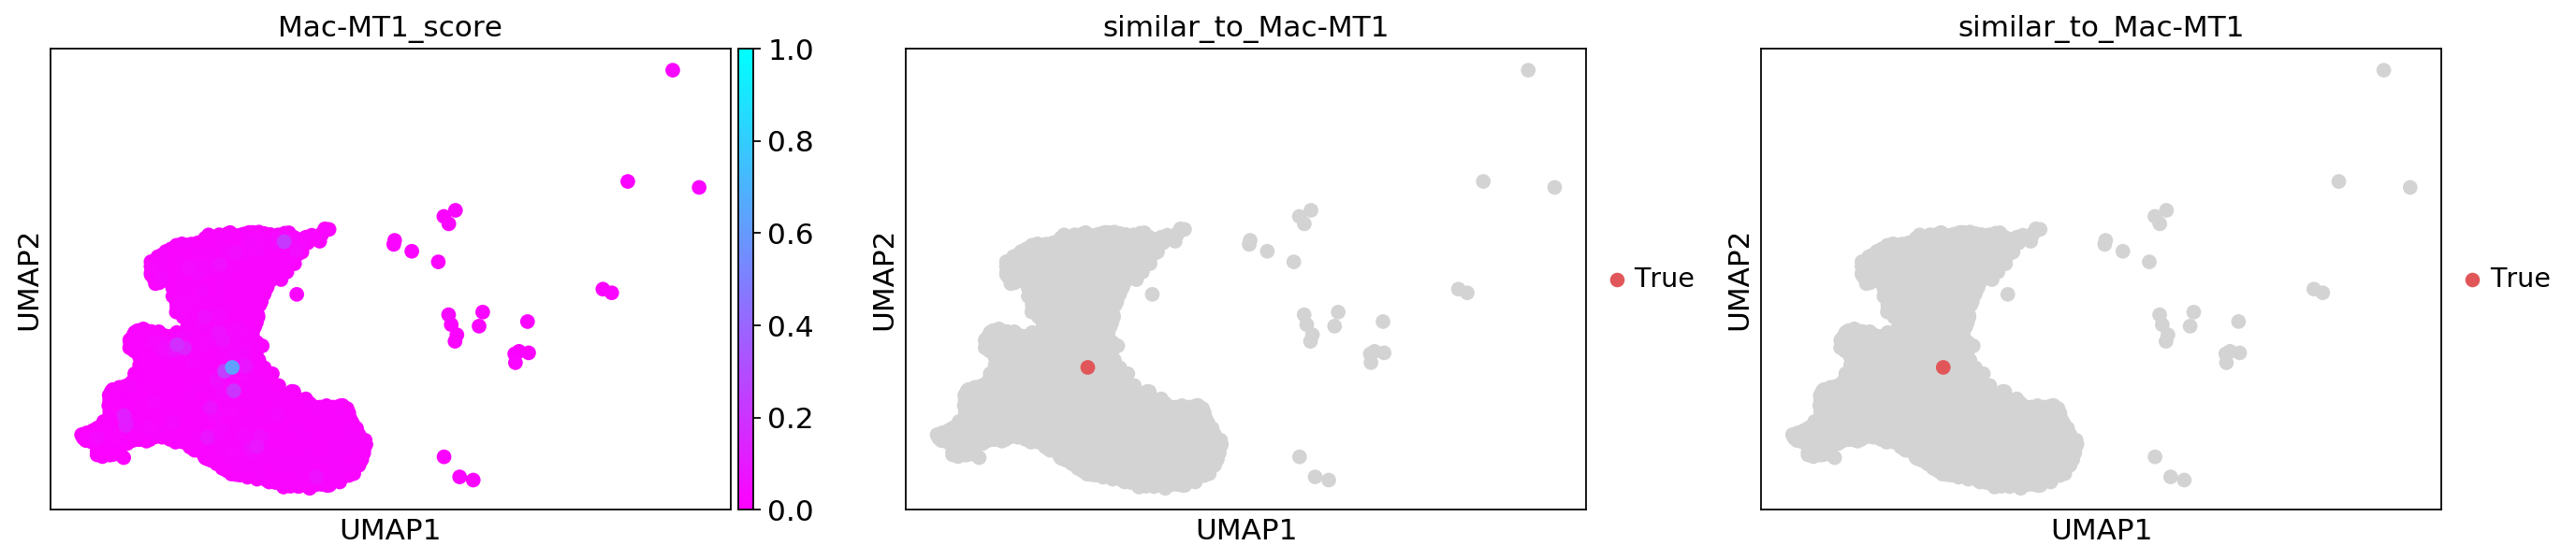

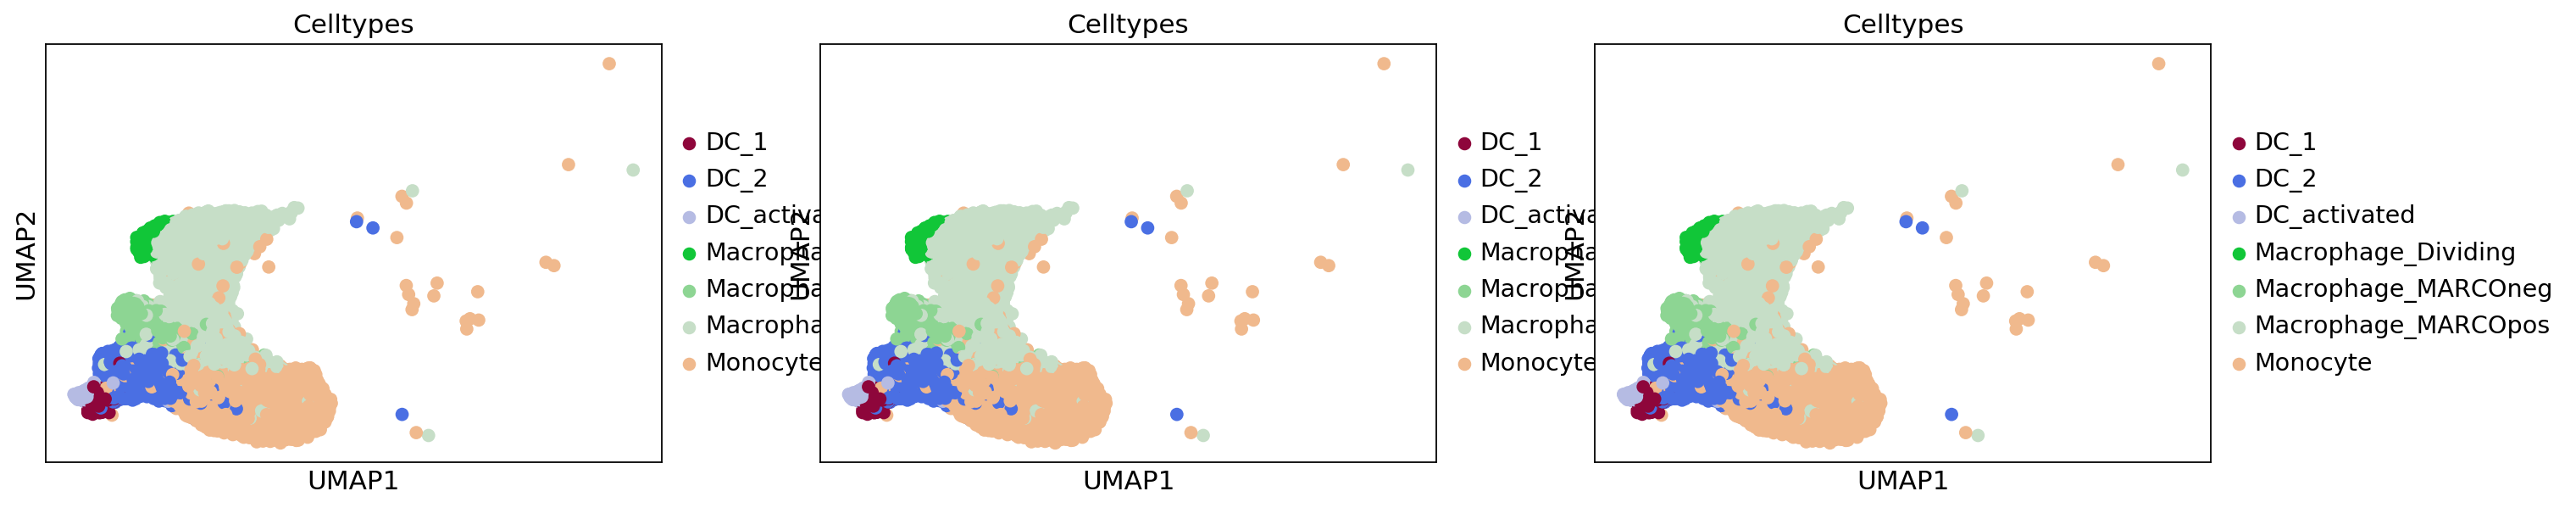

In [5]:
# threshold the p-values to get potential Mac-MT1 calls.
adata.obs['similar_to_Mac-MT1'] = (adata.obs['bh_pval'] < 0.05) & (adata.obs['Mac-MT1_score'] > 0.5)
adata.obs['similar_to_Mac-MT1'] = adata.obs['similar_to_Mac-MT1'].astype('category')
# visualise the Mac-MT1
adata.uns['similar_to_Mac-MT1_colors'] = ['#e5e5e5', '#e15759']
sc.set_figure_params(figsize = [6.0, 4.0], vector_friendly = True, dpi_save = 900)
sc.pl.umap(adata, color = ['Mac-MT1_score','similar_to_Mac-MT1','similar_to_Mac-MT1'], groups = [True], size = 200, save = '/Lung_similarity_to_Mac-MT1.pdf', color_map = 'cool_r',vmax = 1, ncols =3)
sc.pl.umap(adata, color = ['Celltypes','Celltypes','Celltypes'], size = 200, save = '/Lung_MNP_celltypes.pdf', ncols = 3)

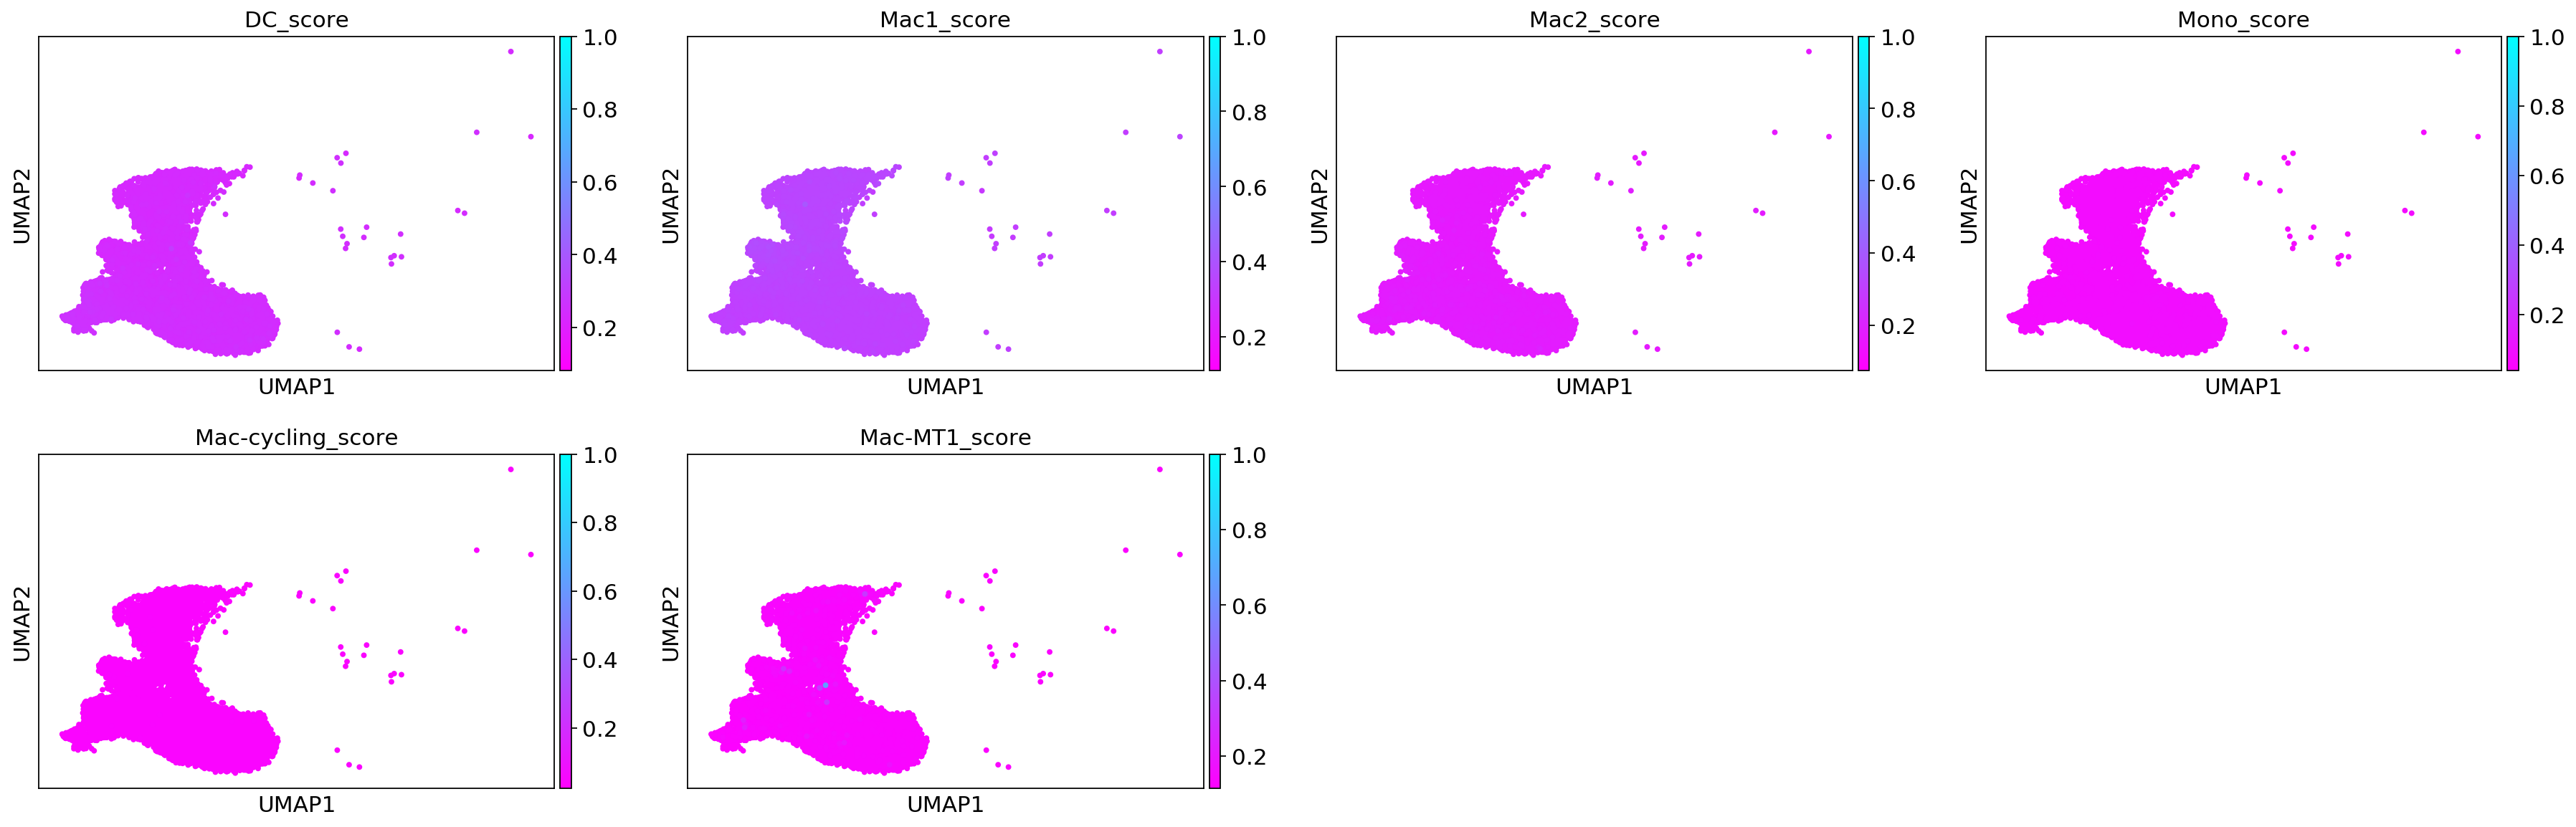

In [5]:
sc.pl.umap(adata, color = ['DC_score', 'Mac1_score', 'Mac2_score', 'Mono_score', 'Mac-cycling_score', 'Mac-MT1_score'], size =50, color_map = 'cool_r', vmax = 1)